# Tissue Specific Motif Networks

In [38]:
net <- read.table('/public/workspace202011/encode/zhutao/analysis/gimmemotif/top2_networks.csv',header=T)
net <-  net[!duplicated(net[c(1,3)]),]
net$type <- net$Tissue
net <- net[,c("Tissue","Factor","zscore","type")]
head(net)

,Tissue,Factor,zscore,type
,<chr>,<chr>,<dbl>,<chr>
1,AM1,LOC_Os02g01380,4.906071,AM1
2,AM1,OsLFL1,4.277486,AM1
3,AM1,OsERF117,3.451406,AM1
4,AM1,EIL1,3.415054,AM1
5,AM1,LOC_Os07g07974,3.330266,AM1
6,AM2,OsLFL1,4.454432,AM2


In [41]:
convert_ID <- read.table('/public/workspace202011/encode/zhutao/result/TF_MSU_RAP_converID.csv',head=T)
aa <- merge(net, convert_ID, by.x="Factor",by.y="gene",all=F)
net <- net[net$type!="AM2" & net$type!="Panicle2" &net$type!="Panicle3" & net$type!="Panicle4" & net$type!="SAM2" & net$type!="Seed1" & net$type!="Seed3" ,]
anno = data.frame(a=unique(net$Tissue),b='Tissues')
tf = data.frame(a=unique(net$Factor),b='TF')
c = rbind(anno,tf)
head(c)

,a,b
,<chr>,<chr>
1,AM1,Tissues
2,Callus,Tissues
3,DBuds,Tissues
4,Leaf,Tissues
5,Lemma,Tissues
6,Palea,Tissues


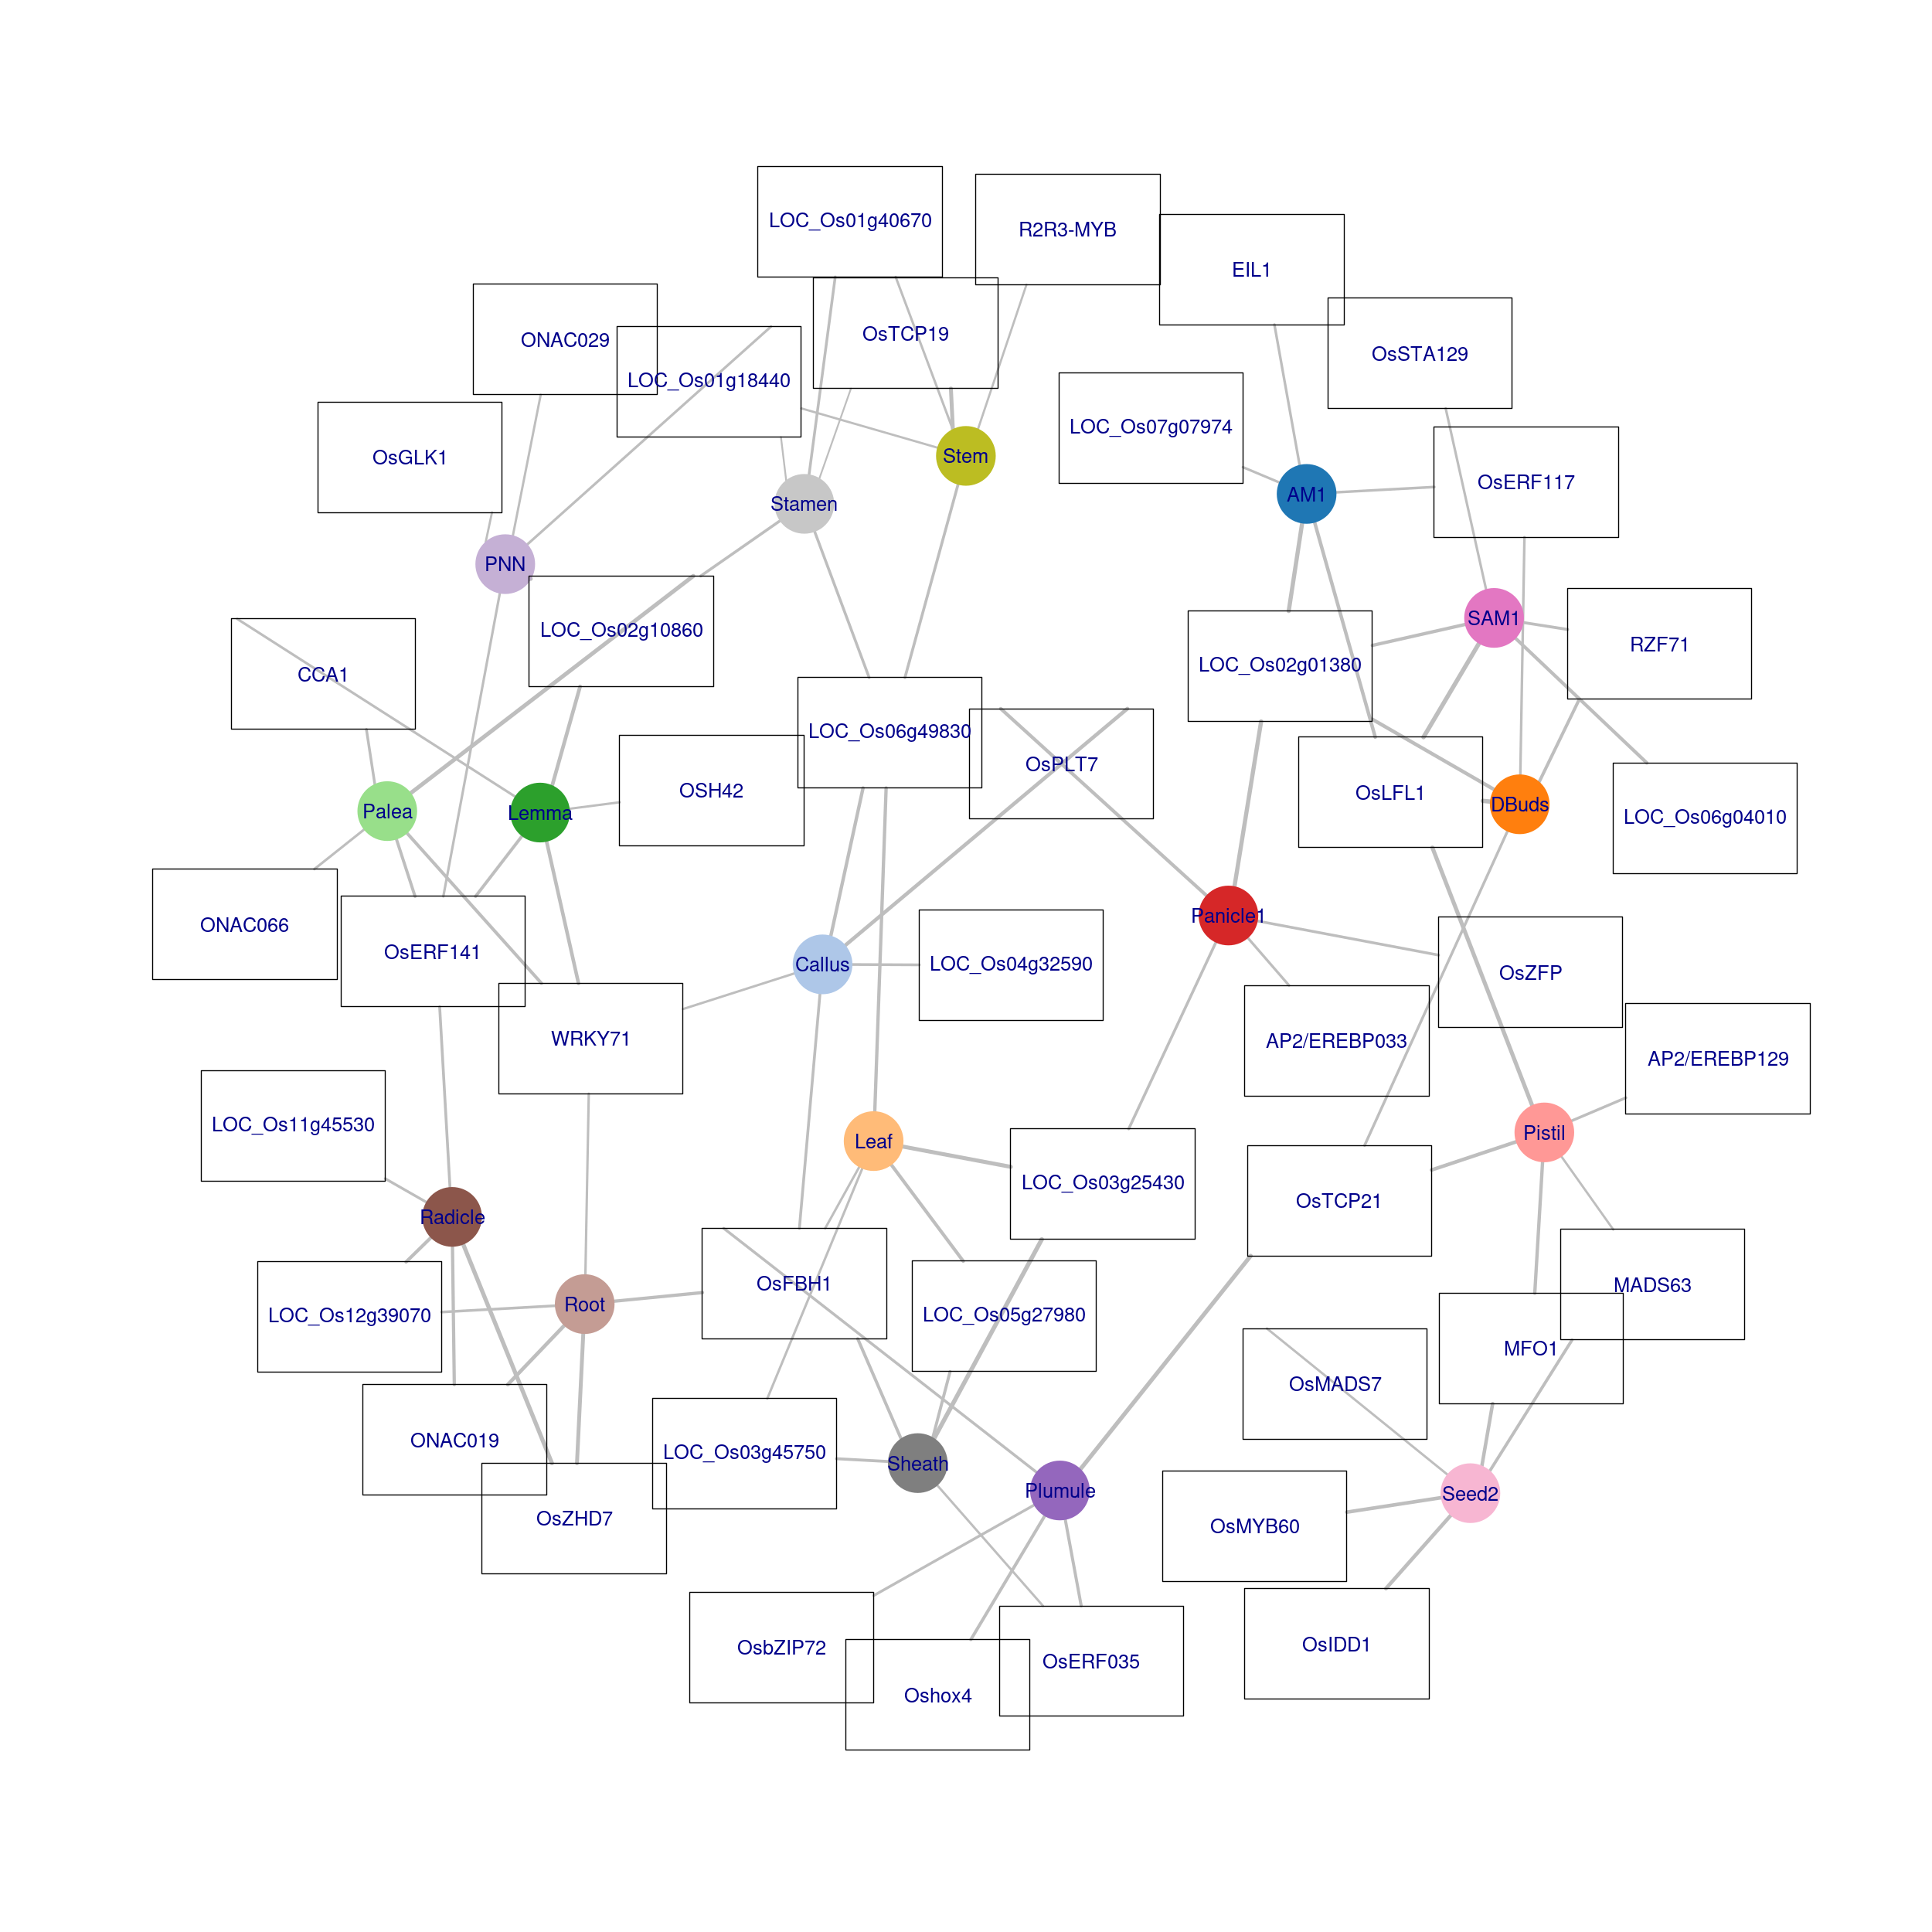

In [43]:
library(igraph)
library(paletteer)
library(qgraph)
net3 <- graph_from_data_frame(d=net, vertices=c, directed=F) 
set.seed(2021)
mycol <- paletteer_d("ggthemes::Classic_20")[1:17]
V(net3)$size <- ifelse(V(net3)$b=="Tissues",8, 25)
V(net3)$shape <- ifelse(V(net3)$b=="Tissues", "circle","rectangle")
V(net3)$frame.color <- ifelse(V(net3)$b=="Tissues", NA,"black")
E(net3)$color <- 'grey'
options(repr.plot.width = 25, repr.plot.height = 25, repr.plot.res = 100)
e <- get.edgelist(net3,names=FALSE)
#e <- get.edgelist(net3,names=FALSE)
l <- qgraph.layout.fruchtermanreingold(e,vcount=vcount(net3),area=8*(vcount(net3)^2),repulse.rad=(vcount(net3)^3.1))
#l <-layout_with_dh(net3) 
#pdf("/public/workspace202011/encode/zhutao/figure/tf_net_works_top5.pdf",width=16,height=16)
plot(net3,vertex.color=mycol,edge.width=(E(net3)$zscore-1),edge.curved = F,layout = l,vertex.label.cex=1.5)
#dev.off()

# Young Panicle Dynamic OCRs

In [ ]:
quant <- read.table("/public/workspace202011/encode/zhutao/analysis/Figure/Fig4/panicle_dynamic/quant/peak_quant_norm.csv",head=T,row.names=1)
library(philentropy)
entropy <- apply(quant, 1, function(x){H(x/sum(x))})
aa <- as.data.frame(H_specificity)
head(data.frame(aa[order(H_specificity),]),5001)
specificty_score <- data.frame(score=H_specificity, peak = names(H_specificity))
spec_peak <- specificty_score[specificty_score$score <=0.0008074347,]
quant[rownames(quant) %in% spec_peak$peak,]
write.table(spec_peak, "/public/workspace202011/encode/zhutao/analysis/Figure/Fig4/panicle_dynamic/cluster1_6_motif/5000_Non_specific_peak.txt",sep='\t',quote=F,col.names=F,row.names=F)

In [1]:
res <- read.table("/public/workspace202011/encode/zhutao/analysis/Figure/Fig4/panicle_dynamic/clutser1_6_merged_peak_TF_CHIP_enrichment.txt")
colnames(res) <- c("TF","left","right","two_tail","ratio")
res$two_tail <- ifelse(res$two_tail==0, 10e-300,res$two_tail)
res$score <- -log10(res$two_tail)
res$name <- substring(res$TF,11)
head(res)

,TF,left,right,two_tail,ratio,score,name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,DRP000207_OSH1,0.00000,1.0000e+00,1.0000e-299,7.618,299.0000000,OSH1
2,DRP001345_OsTGAP1,1.00000,3.1699e-100,3.1699e-100,2.934,99.4989544,OsTGAP1
3,ERP106693_OsIDS1,0.90409,1.1514e-01,2.0542e-01,1.139,0.6873573,OsIDS1
4,ERP106918_NGR2,0.18932,9.3243e-01,3.3582e-01,0.455,0.4738934,NGR2
5,ERP108685_bZIP73,1.00000,4.4624e-10,4.4624e-10,3.720,9.3504315,bZIP73
6,SRP014840_OsSRT1,1.00000,1.6307e-08,1.7340e-08,2.518,7.7609509,OsSRT1


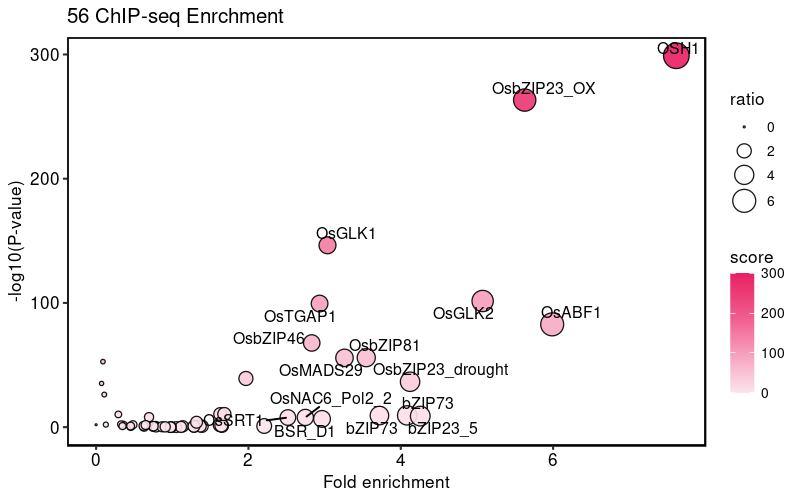

In [2]:
library(ggplot2)
library(ggpubr)
library(paletteer)
library(ggrepel)
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 100)
p1 <- ggplot(res, aes(x=ratio, y=score,label=name))+theme_pubr()+geom_point(aes(size= ratio, fill = score),shape=21,alpha=0.9)+
scale_fill_gradientn(colours = paletteer_d("ggsci::pink_material")[1:6], limits=c(0, 300))+theme_pubr(base_size = 12, base_family = "", border = TRUE, margin = TRUE, 
                      legend = c("right"), x.text.angle = 0)+scale_size_continuous(range = c(0, 8))+
ylab('-log10(P-value)') +xlab("Fold enrichment")+geom_text_repel(data=subset(res, score > 2 & ratio > 2),
            aes(ratio,score,label=name))+ggtitle("56 ChIP-seq Enrchment")
p1

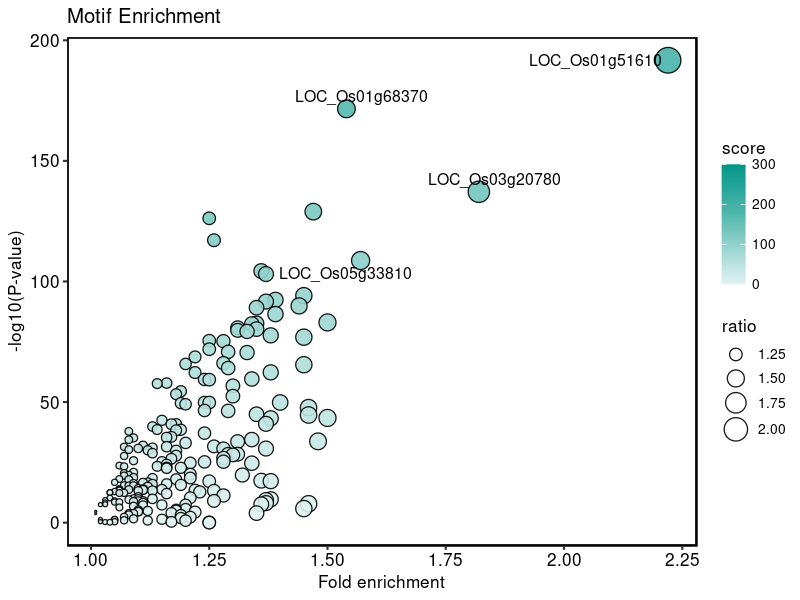

In [3]:
library(stringr)
sea <- read.table("/public/workspace202011/encode/zhutao/analysis/Figure/Fig4/panicle_dynamic/cluster1_6_motif/merged_res/sea.tsv",head=T)
sea <- sea[,c(4,10,15)]
sea$LOG_EVALUE <- -sea$LOG_EVALUE
colnames(sea) <- c("name","ratio","score")
sea$motif <- str_sub(sea$name,1,16)
sea$motif <- gsub("[()]","",sea$motif) 
sea <- sea[sea$score>0,]
# convert_ID <- read.table('/public/workspace202011/encode/zhutao/result/TF_MSU_RAP_converID.csv', head=T)
# merge(sea,convert_ID, by.x="motif",by.y="MSU", all=F)
library(ggplot2)
library(ggpubr)
library(paletteer)
library(ggrepel)
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 100)
p2 <- ggplot(sea, aes(x=ratio, y=score,label=motif))+theme_pubr()+geom_point(aes(size= ratio, fill = score),shape=21,alpha=0.9)+
scale_fill_gradientn(colours = paletteer_d("ggsci::teal_material")[1:6], limits=c(0, 300))+theme_pubr(base_size = 12, base_family = "", border = TRUE, margin = TRUE, 
                      legend = c("right"), x.text.angle = 0)+scale_size_continuous(range = c(0, 8))+
ylab('-log10(P-value)') +xlab("Fold enrichment")+geom_text_repel(data=subset(sea, score > 2 & ratio > 1.5),
            aes(ratio,score,label=motif))+ggtitle("Motif Enrichment")
p2

# Tissue Specific Motif Family Analysis

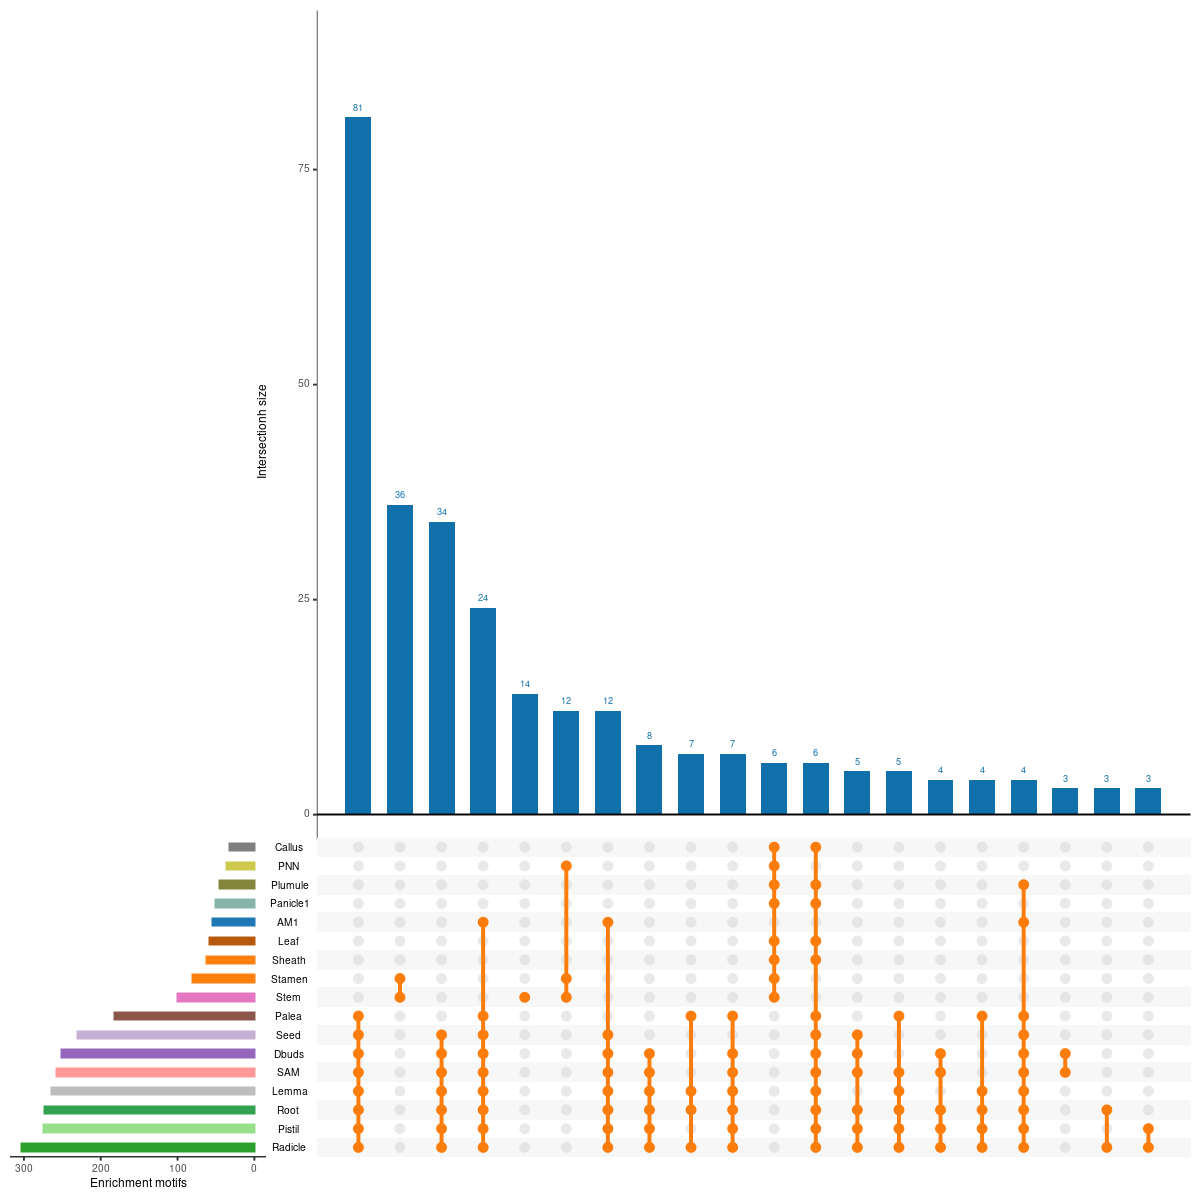

In [5]:
setwd("/public/workspace202011/encode/zhutao/analysis/tf_enrichment/top2500_peaks/sea_out_new/")
file_list = c(
    "AM1" = "AM/sea.tsv",
    "Callus" = "NIP_Callus/sea.tsv",
    "Dbuds" = "NIP_Dormant_buds_umi/sea.tsv",
    "Leaf" = "NIP_Leaf_4_5/sea.tsv",
    "Sheath" = "NIP_Leaf_sheath_4_5/sea.tsv",
    "Lemma"= "NIP_Lemma_umi/sea.tsv",
    "Palea" ="NIP_Palea_umi/sea.tsv",
    "PNN" = "NIP_Panicle_neck_node_umi/sea.tsv",
    "Pistil"= "NIP_Pistil_umi/sea.tsv",
    "Plumule" = "NIP_Plumule/sea.tsv",
    "Radicle" = "NIP_Radicle_umi/sea.tsv",
    "Root" = "NIP_Root_4_5/sea.tsv",
    "Stamen"="NIP_Stamen_umi/sea.tsv",
    "Stem" ="NIP_Stem_umi/sea.tsv",
    "Panicle1"="Panicle/sea.tsv",
    "SAM"="SAM/sea.tsv",
    "Seed"="Seed/sea.tsv"
)
library(GenomicRanges)
peak_list = lapply(file_list, function(f) {
    df = read.table(f,head=T)
    df <- df[df$QVALUE < 1e-10,]
    a = unique(df$ALT_ID)
})

#lengths(peak_list)

library(UpSetR)
library(ggpubr)
# options(repr.plot.width = 16, repr.plot.height = 8, repr.plot.res = 100)
# upset(fromList(peak_list), order.by = "freq",sets = names(lengths(peak_list)),point.size = 3, line.size = 1, 
#     mainbar.y.label = "Intersectionh size", sets.x.label = "Target genes")
#`````````````````````````````````````````My Custom Color Upset Plot`````````````````````````


tissue_col <- c(Leaf="#2ca02c",Sheath="#98df8a",Stem="#32a251",PNN="#bdbdbd",Lemma= "#ff9896",Palea="#9467bd",Pistil="#c5b0d5",
               Stamen="#8c564b",Seed="#e377c2",SAM1="#ff7f0e",AM1="#ff7f0f",
               DBuds="#b85a0d",Panicle1="#1f77b4",Plumule="#86b4a9",Radicle="#82853b",
               Callus="#ccc94d",Root ="#7f7f7f")

options(repr.plot.width = 12, repr.plot.height = 12, repr.plot.res = 100)
p3 <- myupset(fromList(peak_list), order.by = "freq",sets = names(lengths(peak_list)),point.size = 3, line.size = 1, 
    mainbar.y.label = "Intersectionh size", sets.x.label = "Enrichment motifs",sets.bar.color=tissue_col,
    main.bar.color= "#1170AA",matrix.color ="#FC7D0B", number.angles = 0)
p3

In [6]:
setwd("/public/workspace202011/encode/zhutao/analysis/tf_enrichment/top2500_peaks/sea_out_new/")
file_list = c(
    "AM1" = "AM/sea.tsv",
    "Callus" = "NIP_Callus/sea.tsv",
    "Dbuds" = "NIP_Dormant_buds_umi/sea.tsv",
    "Leaf" = "NIP_Leaf_4_5/sea.tsv",
    "Sheath" = "NIP_Leaf_sheath_4_5/sea.tsv",
    "Lemma"= "NIP_Lemma_umi/sea.tsv",
    "Palea" ="NIP_Palea_umi/sea.tsv",
    "PNN" = "NIP_Panicle_neck_node_umi/sea.tsv",
    "Pistil"= "NIP_Pistil_umi/sea.tsv",
    "Plumule" = "NIP_Plumule/sea.tsv",
    "Radicle" = "NIP_Radicle_umi/sea.tsv",
    "Root" = "NIP_Root_4_5/sea.tsv",
    "Stamen"="NIP_Stamen_umi/sea.tsv",
    "Stem" ="NIP_Stem_umi/sea.tsv",
    "Panicle1"="Panicle/sea.tsv",
    "SAM"="SAM/sea.tsv",
    "Seed"="Seed/sea.tsv"
)
library(GenomicRanges)
peak_list = lapply(file_list, function(f) {
    df = read.table(f,head=T)
    df <- df[1:100,]#df[df$QVALUE < 1e-25,]
    a = unique(df$ALT_ID)
})
motif <- stack(peak_list)
motif$motif <- sapply(strsplit(motif$values,")"), `[`, 1)
motif$moitf <- gsub("[()]","",motif$motif)
head(motif)

,values,ind,motif,moitf
,<chr>,<fct>,<chr>,<chr>
1,(LOC_Os01g68370)_(Arabidopsis_thaliana)_(DBD_0.87),AM1,(LOC_Os01g68370,LOC_Os01g68370
2,LOC_Os01g68370,AM1,LOC_Os01g68370,LOC_Os01g68370
3,LOC_Os01g51610,AM1,LOC_Os01g51610,LOC_Os01g51610
4,LOC_Os07g39320,AM1,LOC_Os07g39320,LOC_Os07g39320
5,(LOC_Os03g20780)_(Arabidopsis_thaliana)_(DBD_0.60),AM1,(LOC_Os03g20780,LOC_Os03g20780
6,LOC_Os02g01380,AM1,LOC_Os02g01380,LOC_Os02g01380


In [8]:
fam <- read.table("/public/workspace202011/encode/zhutao/Osj_TF_list.txt",head=T)
sanky <- merge(motif, fam, by.x="motif",by.y="Gene_ID",all=F)
sanky$fre <- 1
sanky <- sanky[,c(3,6,7)]
#sanky$Family <- gsub("BBR-BPC|BES1|CAMTA|E2F/DP|GeBP|SRS|ZF-HD|C3H|EIL|RAV|LFY|LBD|AP2|B3|GATA|WOX|CPP|TALE|ARR-B|Trihelix","Others",sanky$Family)
#sanky$Family <- gsub("M-type_MADS|MIKC_MADS","MADS",sanky$Family)
sanky$tissue <- as.character(sanky$ind)
library(data.table)
library(tidyverse)
res <- table(sanky$tissue,sanky$Family) %>% as.data.frame()%>% reshape(idvar = "Var2", timevar = "Var1", direction = "wide")%>% 
       remove_rownames %>% column_to_rownames(var="Var2")
colnames(res) <- gsub("Freq.","",colnames(res))


Warning message:
“The input is a data frame, convert it to the matrix.”


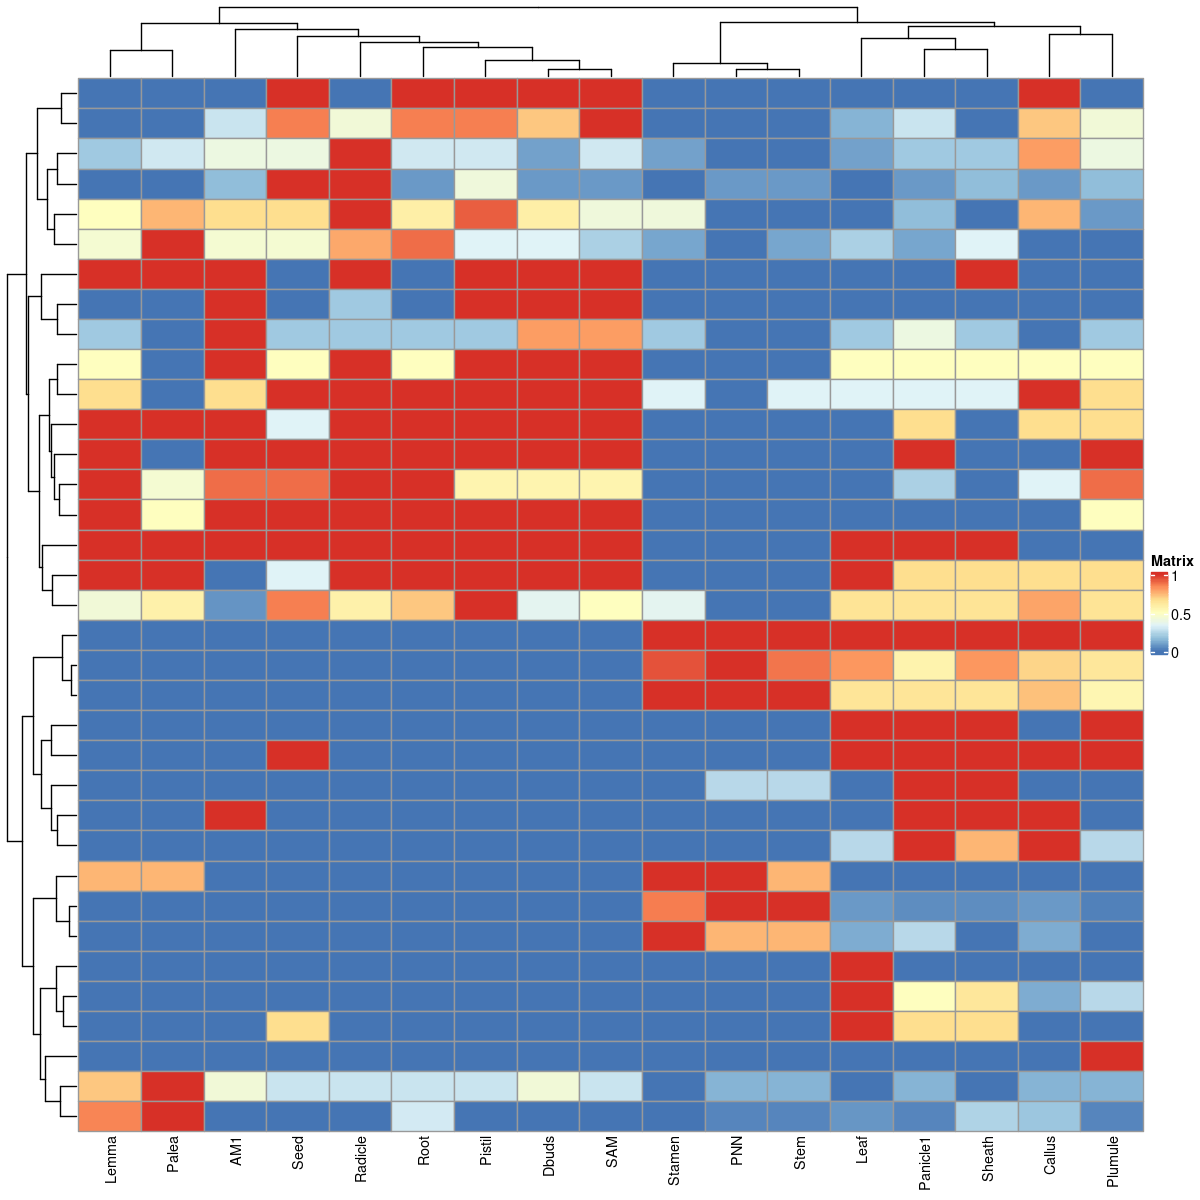

In [11]:
library(pheatmap)
p43 <- pheatmap(res/do.call(pmax, res), show_rownames=F)
library(magrittr)
library(ComplexHeatmap)
library(pheatmap)
p3 = draw(p43)
r.dend <- row_dend(p3)

In [14]:
rcl.list <- row_order(p3)
#rownames(res[rcl.list,])
res2 <- table(sanky$tissue,sanky$Family) %>% as.data.frame()
res2 <- res/do.call(pmax, res)
res2$fam <- rownames(res2)
res3 <- melt(res2)
res3$fam <- factor(res3$fam, levels=rev(rownames(res[rcl.list,])))
res3$variable <- factor(res3$variable, levels=c("Lemma","Palea","AM1","Seed","Radicle","Root","Pistil","Dbuds","SAM","Stamen",
                                                "PNN","Stem","Leaf","Panicle1","Sheath","Callus","Plumule"))
head(res3)

Warning message in melt(res2):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(res2). In the next version, this warning will become an error.”
Using fam as id variables



,fam,variable,value
,<fct>,<fct>,<dbl>
1,AP2,AM1,1
2,ARF,AM1,0
3,ARR-B,AM1,0
4,B3,AM1,1
5,BES1,AM1,0
6,bHLH,AM1,0


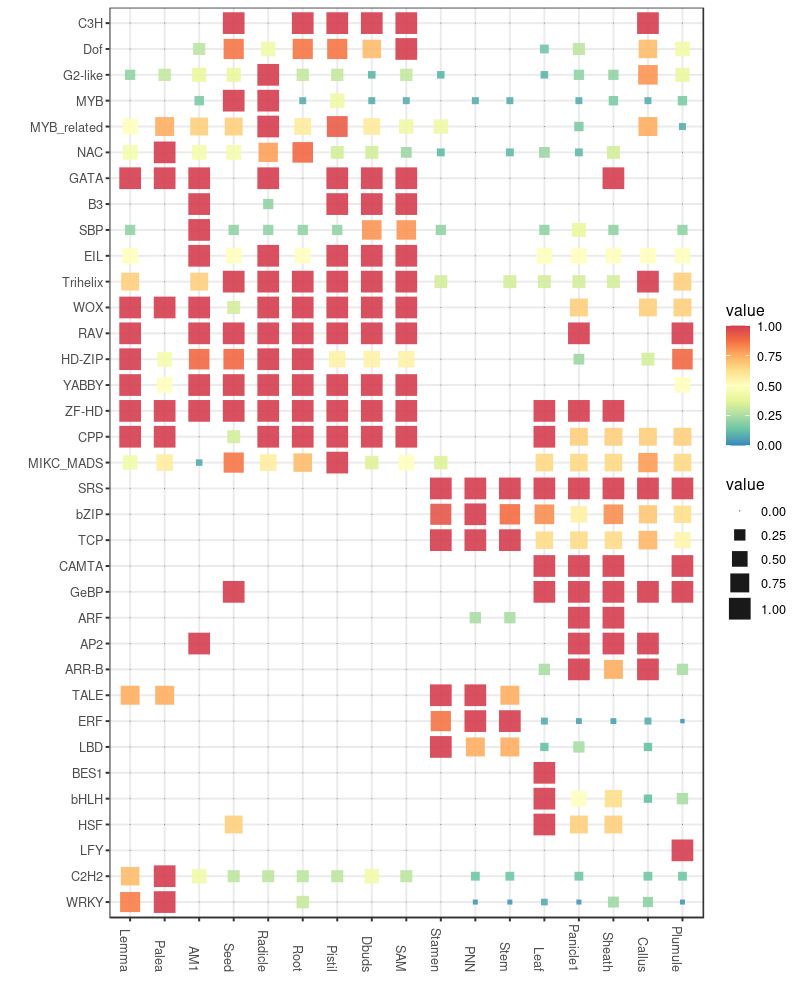

In [15]:
myPalette <- colorRampPalette(as.character(paletteer_d("RColorBrewer::OrRd")[2:6]))
options(repr.plot.width = 8, repr.plot.height = 10, repr.plot.res = 100)
p4 <- ggplot(res3, aes(x=variable, y=fam)) + geom_point(aes(size= value,color=value),shape=15,alpha=0.9)+
scale_color_gradientn(colours =rev(paletteer_d("RColorBrewer::Spectral")[2:10]))+theme_bw()+theme(axis.text.x = element_text(angle = 270, vjust = 1, hjust=1))+scale_size_continuous(range = c(0, 7))+
ylab('') +xlab("")
p4

# Tissue Specific Motif Analysis

In [35]:
test <- read.table('/public/workspace202011/encode/zhutao/ATACorrect/maelstrom/output_new/jaspar_aggregated_zscore_threshold2_cisbp.csv',sep='\t',head=T)
rownames(test) <- make.names(test[,1], unique = TRUE)
test <- subset(test,select=-c(factors))
test <- test[rownames(test) !="X",]
colnames(test) <- sub("z.score.","",colnames(test))
test

,AM1,AM2,Callus,DBuds,Leaf,Lemma,Palea,Panicle1,Panicle2,Panicle3,⋯,Radicle,Root,SAM1,SAM2,Seed1,Seed2,Seed3,Sheath,Stamen,Stem
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LOC_OS06G49830,-0.4666709,-0.32219985,4.17406645,-2.49179593,4.10970587,-0.603527936,-0.4312044,1.733376793,2.3203368,1.6043384,⋯,-4.37523237,-2.67189131,-3.16711542,-2.86476495,-0.42654862,-2.862051027,-1.56968550,2.93446106,3.61664281,3.66614293
HSFB2C.HSFB4B.OSHSFA6A.OSHSFC1B,-1.6975657,-0.78494324,0.41648706,-1.36736578,1.73501270,1.545557797,2.2428570,-0.217915047,0.6795691,-0.1775205,⋯,-1.40586964,-0.31356343,-2.10352840,-2.20378887,1.18905282,1.276868717,1.27585308,0.06600621,1.55461464,0.89141070
ONAC075,-1.9485590,-1.31263865,-0.04508732,-1.76837722,2.62086614,0.425970326,-0.4815454,1.959411072,2.1116965,1.8846729,⋯,-2.35857934,-1.05539112,-2.28674351,-2.21126628,-1.45764823,-2.055007637,2.82449225,2.78766586,-0.20824467,-0.67836387
JMJ702,0.7464345,-0.42476239,-0.06052989,1.99687707,-1.37598287,-1.758379793,-2.3085303,0.647483448,-0.2602739,0.9708447,⋯,-0.39206728,-1.08470494,1.62893684,1.70256419,1.39936631,0.797305110,-1.56726482,-1.68234407,-1.92095555,-1.29703262
LOC_OS05G03020,0.7483268,1.08851936,1.78285642,-0.07019153,0.38238018,-2.415411551,-1.9127050,1.238260664,1.9143577,1.7336910,⋯,-1.56949933,-0.61260507,0.20104603,0.62338756,0.51794631,0.600054522,0.02217347,-0.19305973,-1.53122402,-0.48429320
OSSTA129,2.3582932,1.56869258,-1.29558168,2.78037733,-3.20472685,-0.727564740,-2.4286669,0.713779172,-0.8492254,0.9548959,⋯,2.36398996,1.44319500,3.31756510,3.35983002,-1.11809977,-0.931829859,-2.49288110,-2.67469240,-2.75917541,-2.56371035
LOC_OS04G32590,-1.1249430,-2.03500098,3.55145143,-1.12602926,1.97510365,-3.799647939,-3.2538903,2.954976043,3.3391403,3.0690486,⋯,-2.82542127,-0.17006796,-0.25123694,0.42259885,-0.68337519,-1.428503130,0.16850372,1.70465150,-1.74924262,-1.38677549
OSNTL5,-1.8640346,0.23589583,-1.09305872,0.09043577,-1.15356276,0.070574031,-0.2075436,-1.513828174,-1.1002998,0.3939523,⋯,-0.01576561,-1.12404087,-0.04587536,0.25864348,2.43128986,2.227916549,2.78583162,-0.70585195,0.45052086,0.10134456
OSEIL3.LOC_OS02G36510,-0.9639781,-0.57176677,0.28568334,-0.66082366,2.49510717,-0.112963252,0.2577214,2.218951194,2.6059637,2.3366873,⋯,-3.03933781,-2.07658528,-1.90833175,-1.49599330,-1.01370814,-1.330259088,1.54379426,2.52002731,1.01676606,0.77486085


Warning message:
“The input is a data frame, convert it to the matrix.”


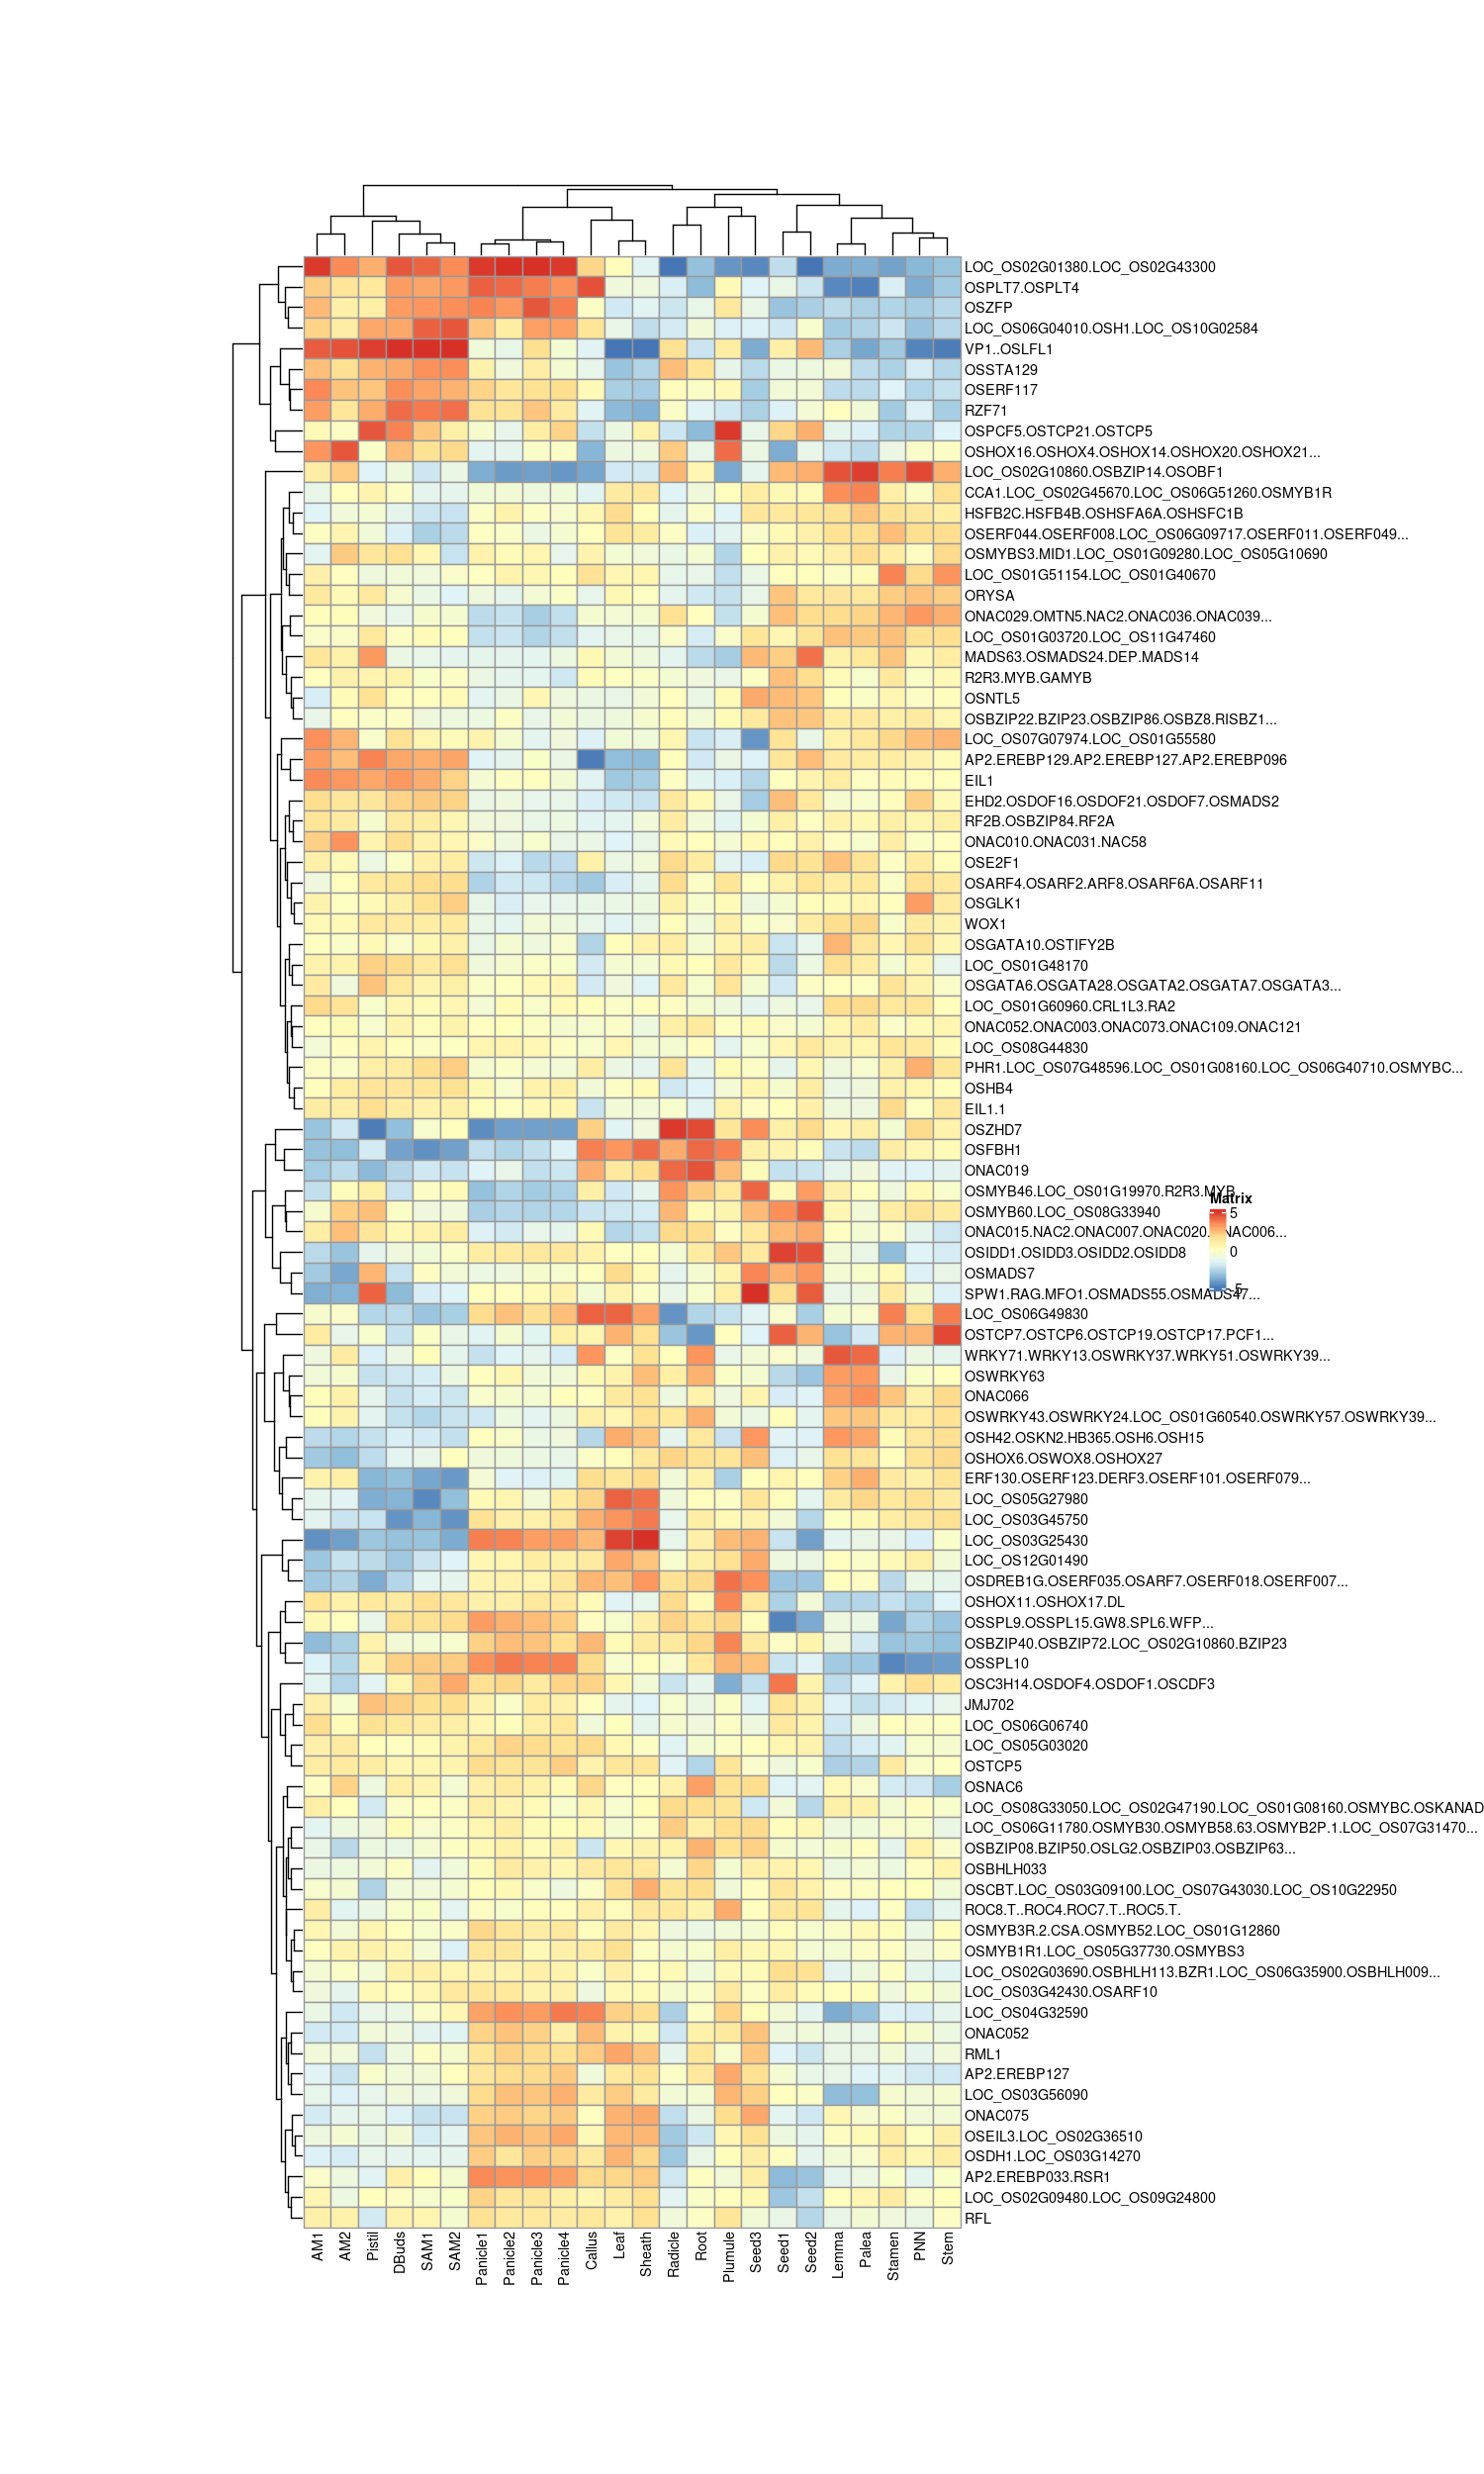

In [36]:
options(repr.plot.width = 15, repr.plot.height =25, repr.plot.res = 100)
library(pheatmap)
blueYellow <- c("1"="#352A86","2"="#343DAE","3"="#0262E0","4"="#1389D2","5"="#2DB7A3","6"="#A5BE6A","7"="#F8BA43","8"="#F6DA23","9"="#F8FA0D")
solarExtra <- c("5"='#3361A5', "7"='#248AF3', "1"='#14B3FF', "8"='#88CEEF', "9"='#C1D5DC', "4"='#EAD397', "3"='#FDB31A',"2"= '#E42A2A', "6"='#A31D1D')
horizonExtra <- c("1"="#000436","4"="#021EA9","6"="#1632FB","8"="#6E34FC","3"="#C732D5","9"="#FD619D","7"="#FF9965","5"="#FFD32B","2"="#FFFC5A")
p5<- pheatmap(test,cellwidth=20,cellheight=15)
p5

# Footprint R script

In [26]:
#!/usr/bin/env Rscript
# options(warn=-1)
# args = commandArgs(trailingOnly=TRUE)
# motif <- args[1]
# save <- args[2]
plot_footprint <- function(motif, save){
    library(genomation)
    library(EnrichedHeatmap)
    library(GenomicRanges)
    cal_footprint <- function(gene_bed, coverage_bed, group_name) { 
    gene <- readBed(gene_bed)
    coverage <- read.table(coverage_bed)
    colnames(coverage) <- c("chr","start","end","coverage")
    cov <- makeGRangesFromDataFrame(coverage,keep.extra.columns=T)
    mat1 = normalizeToMatrix(cov, gene, value_column = "coverage", 
                             extend = 200, mean_mode = "w0", w = 1,smooth = TRUE,background = NA,trim=c(0.01, 0.01))
    # group_name <- gsub(".bed","", basename(args[2]))
    # gene_name <- gsub(".bed","",basename(args[1]))
    quant_smo <- data.frame(x = c(1:length(colnames(mat1))), density=colMeans(mat1,na.rm=T),group=group_name)
    return(quant_smo)
}
    library(parallel)
    a <- list(sprintf("/public/workspace202011/encode/zhutao/analysis/TOBIAS/ATACorrect/panicle_correct/bindetect/%s/beds/%s_all.bed",motif,motif),
         sprintf("/public/workspace202011/encode/zhutao/analysis/TOBIAS/ATACorrect/panicle_correct/bindetect/%s/beds/%s_all.bed",motif,motif),
         sprintf("/public/workspace202011/encode/zhutao/analysis/TOBIAS/ATACorrect/panicle_correct/bindetect/%s/beds/%s_all.bed",motif,motif),
         sprintf("/public/workspace202011/encode/zhutao/analysis/TOBIAS/ATACorrect/panicle_correct/bindetect/%s/beds/%s_all.bed",motif,motif))

    b <- list("/public/workspace202011/encode/zhutao/analysis/TOBIAS/ATACorrect/panicle_correct/NIP_YP4_final.bed",
             "/public/workspace202011/encode/zhutao/analysis/TOBIAS/ATACorrect/panicle_correct/NIP_YP3_final.bed",
             "/public/workspace202011/encode/zhutao/analysis/TOBIAS/ATACorrect/panicle_correct/NIP_YP2_final.bed",
             "/public/workspace202011/encode/zhutao/analysis/TOBIAS/ATACorrect/panicle_correct/NIP_YP1_final.bed")
    c <- list("YP4","YP3","YP2","YP1")
    res <- list()
    res <- parallel::mcmapply(function(gene_bed, coverage_bed, group_name){
        return(cal_footprint(gene_bed, coverage_bed, group_name))
    }, gene_bed=a,coverage_bed=b,group_name=c,mc.cores=length(b))
    tt <- data.frame(x=c(res[[1]],res[[4]],res[[7]],res[[10]]), density=c(res[[2]],res[[5]],res[[8]],res[[11]]), group=c(res[[3]], res[[6]],res[[9]],res[[12]]))
    tt <- tt[tt$group==c("YP1","YP2","YP3","YP4"),]
    options(repr.plot.width = 7, repr.plot.height = 6, repr.plot.res = 100)
    p3 <- ggplot(tt, aes(x=x, y=density, color=group)) +
            geom_line(size=0.5)+#+theme(panel.background = element_rect(fill = "white", colour = "grey50"))+
            scale_color_manual(values = c("#ABD9E9","#74ADD1","#4575B4","#313695"))+scale_linetype_manual(values=c(rep("solid",5)))+
            theme_pubr(base_size = 12,base_family = "", border = TRUE, margin = TRUE, legend = c("right"), x.text.angle = 0)+
            geom_vline(xintercept = c(200-8,200+8), linetype="dashed", color = "#5C6068", size=0.5)+
            coord_cartesian(expand = T, ylim = c(0, 1.2*quantile(tt$density, 0.999)))+ scale_x_continuous(breaks=c(0,100,200,300,400),
   labels=c("-200", "-100", "0","100","200"))+labs(x = "Distance to motif center (bp)", y = 'Tn5 bias-corrected normalized insertions')
   #ggtitle(sprintf("%s_%s",unlist(strsplit(motif,"_"))[1],unlist(strsplit(motif,"_"))[2]))+theme(plot.title = element_text(hjust = 0.5))
   pdf(save,width=7,height=6)
   print(p3)
   dev.off()
   #p3
   return
}
# plot_footprint(motif, save)